# Plot Tutorial

This notebook covers the plot functions implemented in NetworKit. The plots help to evaluate and visualize certain properties of a graph.  

Note: The `matplotlib` library, as well as the `seaborn` library needs to be installed on your device. For example use `pip install matplotlib` to obtain it.

The first step is to import NetworKit.

In [1]:
import networkit as nk

### DegreeDistribution

The `degreeDistribution` of a graph describes the degree (incoming and outgoing edges) that each node has. `Networkit.plot.degreeDistribution` plots how many nodes of each degree exist within a graph.

We start by creating a graph `G`.

In [2]:
G=nk.Graph(7)
G.addEdge(0,1)
G.addEdge(0,2)
G.addEdge(1,2)
G.addEdge(2,3)
G.addEdge(2,4) 
G.addEdge(3,5)
G.addEdge(5,6) 

True

Plotting the `degreeDistribution` of a graph `G` can be done the following way:  

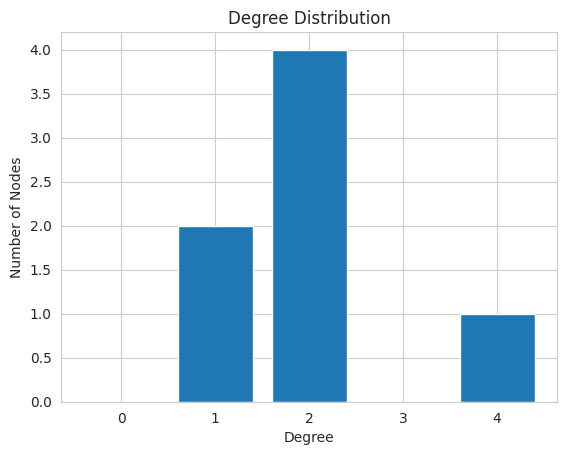

In [3]:
nk.plot.degreeDistribution(G)

### ConnectedComponentsSizes

The `connectedComponentsSizes` describe how many nodes of the graph the individual connected components contain. `Networkit.plot.connectedComponentsSizes` plots for each indivual component how many nodes of the graph it contains. By default it shows the size relative (as percentages) to the entire population, if `relativeSizes` is set to `False`, it shows the absolute number of nodes in each component.

Note: See [networkit.components.ConnectedComponents](https://networkit.github.io/dev-docs/python_api/components.html?highlight=connectedcomponents#networkit.components.ConnectedComponents) for a description of the algorithm.

For the next example we create a new graph `G2` with 3 components: the first component contains the nodes 0-3, the second contains the nodes 4 and 5, and the third contains only node 6 (component of size 1).

In [4]:
G2=nk.Graph(7)
G2.addEdge(0,1) 
G2.addEdge(1,2)
G2.addEdge(2,3)
G2.addEdge(4,5)

True

Plotting the `connectedComponentsSizes` of a graph `G` can be done the following way:

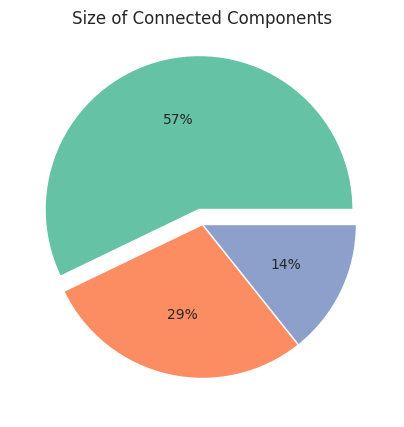

In [5]:
nk.plot.connectedComponentsSizes(G2, relativeSizes=True)

### NodeAttributes

The `nodeAttributes` are useful in order to efficiently incorporate additional information in the graph data structure.

Note: See [networkit.GraphTutorial](https://networkit.github.io/dev-docs/notebooks/GraphNotebook.html) in section `NodeAttributes` for a detailed description.

For this example we create a new graph `G_attr` which contains additional graph attributes.

In [6]:
G_attr=nk.Graph(4)
G_attr.addEdge(0,1) 
G_attr.addEdge(1,2) 
G_attr.addEdge(2,3)
#attaching the attributes to the graph
attrFloat = G_attr.attachNodeAttribute("myFloat", float)
attrStr = G_attr.attachNodeAttribute("myStr", str)
#setting attribute values
attrFloat[0] = 0.5
attrFloat[1] = 1.5
attrStr[1] = "tutorial"
attrStr[2] = "again"

Note: The `nk.plot.nodeAttributes` can only be called with either one `nodeAttribute` or a `tuple` of exactly two `nodeAttributes`. 

- If called with a single `nodeAttribute`, it plots how frequent each value of the `nodeAttribute` is present in the graph.

- If called with two `nodeAttributes`, it plots the 2-Dimensional distribution of the nodes according to the given `nodeAttributes`

Plotting the `nodeAttributes` of a graph `G` can be done the following way:

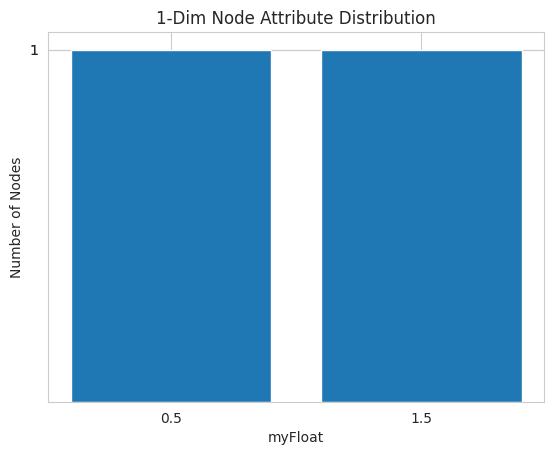

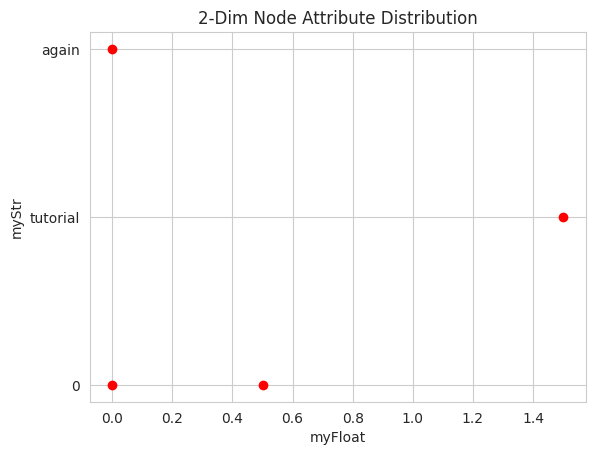

In [7]:
#example with a single attribute
nk.plot.nodeAttributes(G_attr, attrFloat)

#example with two attributes
nk.plot.nodeAttributes(G_attr, (attrFloat, attrStr))

### ClusteringPerDegree

`ClusteringPerDegree` can be used as `centrality` measure of the graph. `Networkit.plot.ClusteringPerDegree` plots for each degree (obtained by [DegreeCentrality](https://networkit.github.io/dev-docs/python_api/centrality.html?highlight=degreecentr#networkit.centrality.DegreeCentrality)) the so called [Clustering Coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient) `(cc)` that measures how tight adjacent nodes are clustered together.

For this example we read a medium sized graph given by the `networkit.input` graphs.

In [8]:
# read a graph
G_jazz = nk.readGraph("../input/jazz.graph", nk.Format.METIS)

Note: The `pandas` library, as well as the `seaborn` library needs to be installed on your device.

Plotting the `ClusteringPerDegree` of a graph `G` can be done the following way:

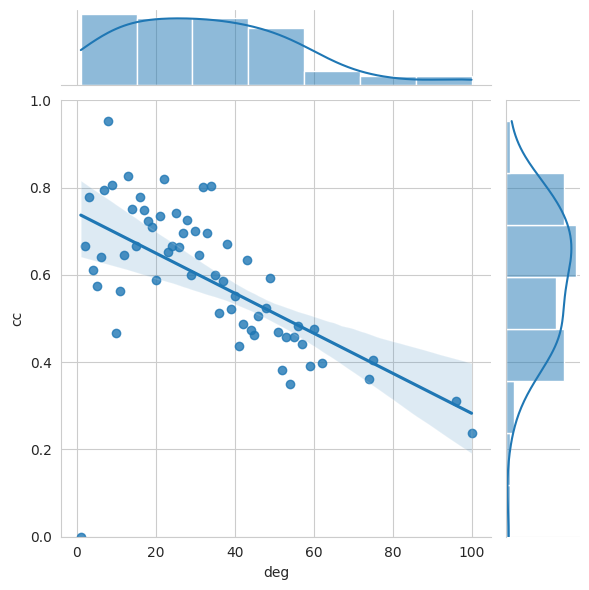

In [9]:
nk.plot.clusteringPerDegree(G_jazz)

### CoreDecomposition

The `CoreDecomposition` algorithm computes the k-core decomposition of a graph, which is the largest induced subgraph, only consisting of nodes, whose degree is greater than or equal to `k`. `Networkit.plot.coreDecompositionSequence` plots the size (number of nodes) of each k-induced subgraph.

See [networkit.centrality.coreDecomposition](https://networkit.github.io/dev-docs/python_api/centrality.html?highlight=coredecomp#networkit.centrality.CoreDecomposition) for a description of the algorithm.

For the next example we create a new graph `G3`, whose k2-shell has size 4 (nodes: 1,3,4,5) and whose k1-shell has size 2 (nodes 0 and 2). 

In [10]:
G3=nk.Graph(6)
G3.addEdge(0,3) # G3:  0
G3.addEdge(1,3) #      |
G3.addEdge(2,3) #  1 - 3 - 2
G3.addEdge(1,4) #  | X |
G3.addEdge(1,5) #  4 - 5  
G3.addEdge(3,4) 
G3.addEdge(4,5)
G3.addEdge(3,5)

True

Plotting the `coreDecompositionSequence` of a graph `G` can be done the following way:

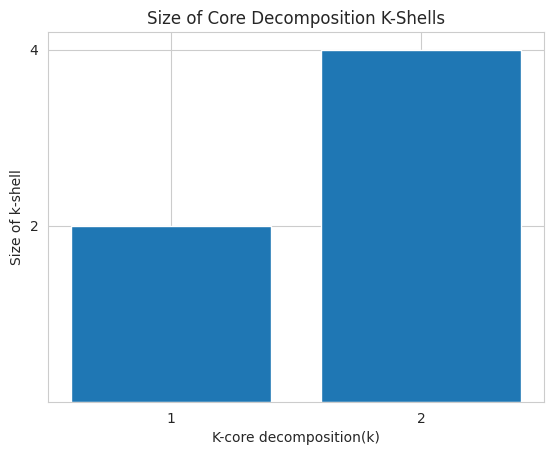

In [11]:
nk.plot.coreDecompositionSequence(G3)

### HopPlot

The `hopPlot` is the set of pairs `(d, g(d))` for each natural number `d`, where `g(d)` is the fraction of connected node pairs whose shortest connecting path has length at most `d`. The `networkit.plot.hopPlot` plots the percentage of connected node pairs, that have a connecting path of length at most `d`. 

Note: The algorithm is approximative. See [networkit.distance.hopPlotApproximation](https://networkit.github.io/dev-docs/python_api/distance.html?highlight=hopplotapp#networkit.distance.HopPlotApproximation) for a detailed description of the algorithm.

For this example we read a medium sized graph given by the `networkit.input` graphs.

In [12]:
#larger example
G_big = nk.readGraph("../input/power.graph", nk.Format.METIS)

Plotting the `hopPlot` of a graph `G` can be done the following way:

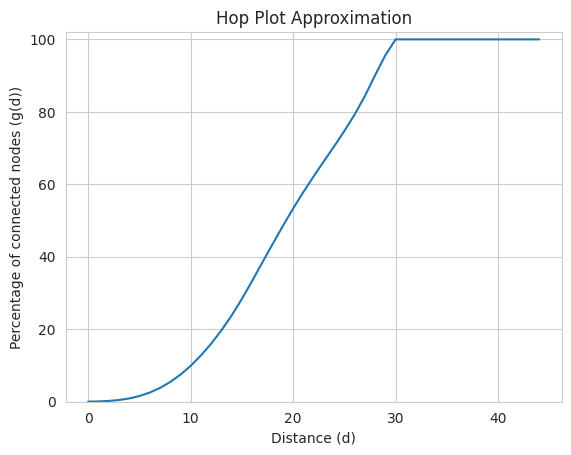

In [13]:
nk.plot.hopPlot(G_big)